In [2]:
from keras.utils import to_categorical

from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from keras.models import model_from_json


In [3]:
TRAIN_DIR = "images\\Train"
VALID_DIR = "images\\Validation"



In [4]:
#creates dataframe with foldername  and fetches the respective picture path 
def createsdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
    return image_paths, labels
train=pd.DataFrame()
train['image'],train['label']= createsdataframe(VALID_DIR)
print(train)
test=pd.DataFrame()
test['image'],test['label']= createsdataframe(TRAIN_DIR)
print(test)


                                    image     label
0       images\Validation\angry\10052.jpg     angry
1       images\Validation\angry\10065.jpg     angry
2       images\Validation\angry\10079.jpg     angry
3       images\Validation\angry\10095.jpg     angry
4       images\Validation\angry\10121.jpg     angry
...                                   ...       ...
7061  images\Validation\surprise\9806.jpg  surprise
7062  images\Validation\surprise\9830.jpg  surprise
7063  images\Validation\surprise\9853.jpg  surprise
7064  images\Validation\surprise\9878.jpg  surprise
7065   images\Validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]
                                image     label
0            images\Train\angry\0.jpg     angry
1            images\Train\angry\1.jpg     angry
2           images\Train\angry\10.jpg     angry
3        images\Train\angry\10002.jpg     angry
4        images\Train\angry\10016.jpg     angry
...                               ...       ...
28816  images\T

In [5]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = "grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
train_features=extract_features(train['image'])
test_features=extract_features(test['image'])


  0%|          | 0/7066 [00:00<?, ?it/s]

  0%|          | 0/28821 [00:00<?, ?it/s]

In [6]:
x_train=train_features/255.0
x_test=test_features/255.0


In [7]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [8]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [9]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [10]:
model= Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))



c:\Users\Hk200\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=128, epochs=200, validation_data=(x_test, y_test))


Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2382 - loss: 1.8564 - val_accuracy: 0.2486 - val_loss: 1.8161
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.2540 - loss: 1.8177 - val_accuracy: 0.2486 - val_loss: 1.8225
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.2571 - loss: 1.8177 - val_accuracy: 0.2486 - val_loss: 1.8168
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.2596 - loss: 1.8205 - val_accuracy: 0.2486 - val_loss: 1.8126
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.2636 - loss: 1.8132 - val_accuracy: 0.2486 - val_loss: 1.8135
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 938ms/step - accuracy: 0.2640 - loss: 1.8114 - val_accuracy: 0.2486 - val_loss: 1.8140
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 978ms/step - accuracy: 0.2591 - loss: 1.8142 - val_accuracy: 0.2486 - val_loss: 1.8132
Epoch 8/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 942ms/step - accuracy: 0.2515 - loss: 1.8150 - val_accuracy:

In [12]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [13]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [14]:



label = ['angry','disgust','fear','happy','neutral','sad','surprise']

def check(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0




In [15]:




image = r'images\Train\happy\14.jpg'
print("original image is of happy")
img = check(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
model prediction is  happy


c:\Users\Hk200\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  happy


c:\Users\Hk200\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


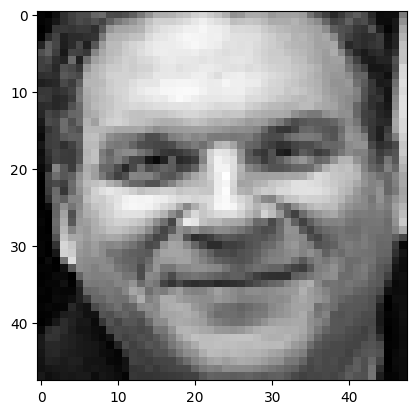

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
image =  r'images\Train\happy\14.jpg'
print("original image is of sad")
img = check(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')